## Classification - SVM

## Name     : Mahavir Teraiya

In [303]:
!pip install yellowbrick
import numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from yellowbrick.classifier import ClassificationReport
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [304]:
# import some data to play with

raw_data_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', sep = ',', names=['Sample code number: id number','Clump Thickness: 1 - 10','Uniformity of Cell Size: 1 - 10','Uniformity of Cell Shape: 1 - 10','Marginal Adhesion: 1 - 10','Single Epithelial Cell Size: 1 - 10','Bare Nuclei: 1 - 10','Bland Chromatin: 1 - 10','Normal Nucleoli: 1 - 10','Mitoses: 1 - 10','Class: (2 for benign, 4 for malignant)'])

In [305]:
# GET DaTa Insight

raw_data_df.count()
raw_data_df.info()
raw_data_df.isna().sum()
for key, value in raw_data_df.iteritems():
    print("Unique %s data: " % (str(key)))
    print(value.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number: id number             699 non-null int64
Clump Thickness: 1 - 10                   699 non-null int64
Uniformity of Cell Size: 1 - 10           699 non-null int64
Uniformity of Cell Shape: 1 - 10          699 non-null int64
Marginal Adhesion: 1 - 10                 699 non-null int64
Single Epithelial Cell Size: 1 - 10       699 non-null int64
Bare Nuclei: 1 - 10                       699 non-null object
Bland Chromatin: 1 - 10                   699 non-null int64
Normal Nucleoli: 1 - 10                   699 non-null int64
Mitoses: 1 - 10                           699 non-null int64
Class: (2 for benign, 4 for malignant)    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
Unique Sample code number: id number data: 
[ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572

In [306]:
# Do Feature Engineering Based On The previous step data insight

raw_data_df = raw_data_df.drop(['Sample code number: id number'],  axis=1)
raw_data_df.drop_duplicates(keep="first", inplace=True)
raw_data_df['Bare Nuclei: 1 - 10'].replace('?', '1', inplace= True)
raw_data_df['Bare Nuclei: 1 - 10'].value_counts()
raw_data_df[['Bare Nuclei: 1 - 10']] = raw_data_df[['Bare Nuclei: 1 - 10']].astype("int")

In [307]:
le = preprocessing.LabelEncoder()
raw_data_df = raw_data_df.apply(le.fit_transform)

In [308]:
# Confirm Data 

raw_data_df.count()
raw_data_df.info()
raw_data_df.isna().sum()
for key, value in raw_data_df.iteritems():
    print("Unique %s data: " % (str(key)))
    print(value.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness: 1 - 10                   463 non-null int64
Uniformity of Cell Size: 1 - 10           463 non-null int64
Uniformity of Cell Shape: 1 - 10          463 non-null int64
Marginal Adhesion: 1 - 10                 463 non-null int64
Single Epithelial Cell Size: 1 - 10       463 non-null int64
Bare Nuclei: 1 - 10                       463 non-null int64
Bland Chromatin: 1 - 10                   463 non-null int64
Normal Nucleoli: 1 - 10                   463 non-null int64
Mitoses: 1 - 10                           463 non-null int64
Class: (2 for benign, 4 for malignant)    463 non-null int64
dtypes: int64(10)
memory usage: 39.8 KB
Unique Clump Thickness: 1 - 10 data: 
[4 2 5 3 7 0 1 6 9 8]
Unique Uniformity of Cell Size: 1 - 10 data: 
[0 3 7 9 1 2 6 4 5 8]
Unique Uniformity of Cell Shape: 1 - 10 data: 
[0 3 7 9 1 2 4 5 6 8]
Unique Marginal Adhesion: 1 - 10 data: 
[0 4 2 7

In [309]:
X = raw_data_df.drop(['Class: (2 for benign, 4 for malignant)'],  axis=1).values
y = raw_data_df['Class: (2 for benign, 4 for malignant)'].values

In [310]:
# Take Data Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model Building

In [311]:
#Create SVM Classifier Object & Training

# Instantiate the classifier
clf = svm.LinearSVC()

#Train the classifier
clf.fit(X_train, y_train)

clf.get_params()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Accuracy Measurement Of Linear SVM

In [312]:
#Compute the accuracy and confusion matrix. (1 marks)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Confusion Matrix for the test
confusion_matrix(y_test, y_pred)

Accuracy: 0.956989247311828


array([[44,  3],
       [ 1, 45]])

In [313]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.94      0.98      0.96        46

   micro avg       0.96      0.96      0.96        93
   macro avg       0.96      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



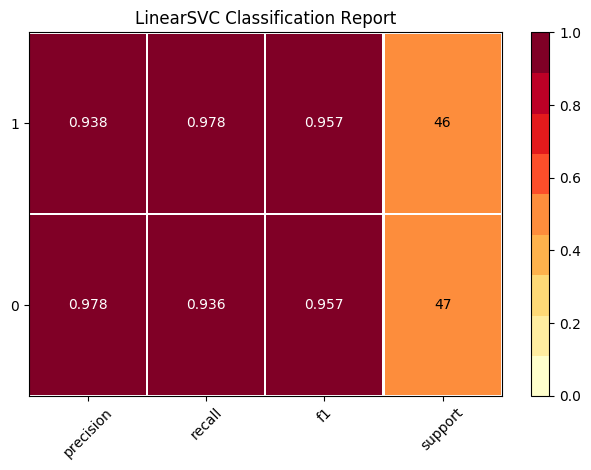

In [314]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(svm.LinearSVC(), classes=np.unique(y_train), support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Poly Kernal

In [315]:
#Create SVM Classifier Object & Training

# Instantiate the classifier
poly_clf = svm.SVC(kernel='poly', degree=5)

#Train the classifier
poly_clf.fit(X_train, y_train)

poly_clf.get_params()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 5,
 'gamma': 'auto_deprecated',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Accuracy Measurement Of Poly SVM

In [316]:
#Compute the accuracy and confusion matrix. (1 marks)

#Predict the response for test dataset
poly_clf_y_pred = poly_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, poly_clf_y_pred))

#Confusion Matrix for the test
confusion_matrix(y_test, poly_clf_y_pred)

Accuracy: 0.9139784946236559


array([[44,  3],
       [ 5, 41]])

In [317]:
print(classification_report(y_test, poly_clf_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        47
           1       0.93      0.89      0.91        46

   micro avg       0.91      0.91      0.91        93
   macro avg       0.91      0.91      0.91        93
weighted avg       0.91      0.91      0.91        93



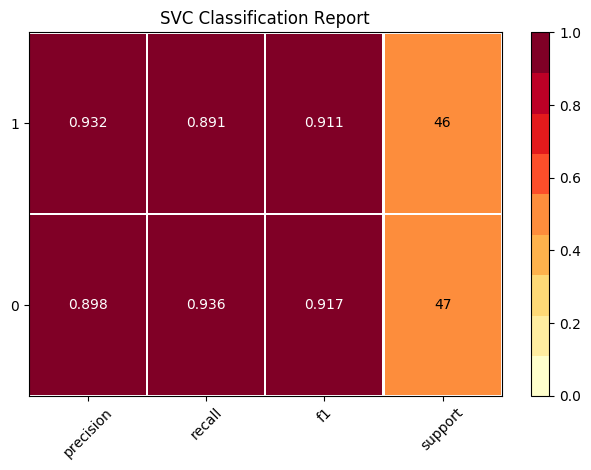

In [318]:
visualizer = ClassificationReport(poly_clf, classes=np.unique(y_train), support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## c) Draw bar chart depicting blue bar for linear SVM and red bar for polynomial SVM, 
## compare their performance based on precision, recall, accuracy and F1-score.

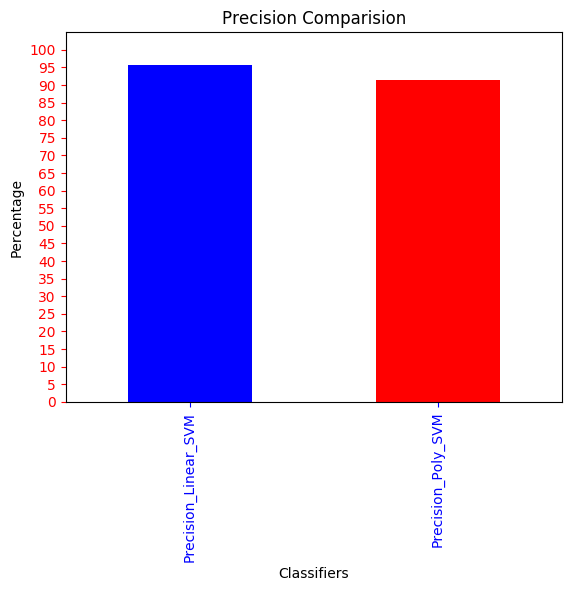

In [319]:
Precision_Linear_SVM = (precision_score(y_test, y_pred, average='weighted'))*100
Precision_Poly_SVM = (precision_score(y_test, poly_clf_y_pred, average='weighted'))*100

s = pd.Series(
    [Precision_Linear_SVM, Precision_Poly_SVM],
    index = ["Precision_Linear_SVM", "Precision_Poly_SVM"]
)

#Set descriptions:
plt.xlabel('Classifiers')
plt.ylabel('Percentage')
plt.title('Precision Comparision')
plt.ylim([0, 105])
plt.yticks(np.arange(0, 105, 5))

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')


#Plot the data:
my_colors = ['blue', 'red']  #red, green, blue, black, etc.

s.plot(
    kind='bar', 
    color=my_colors,
)


plt.show()

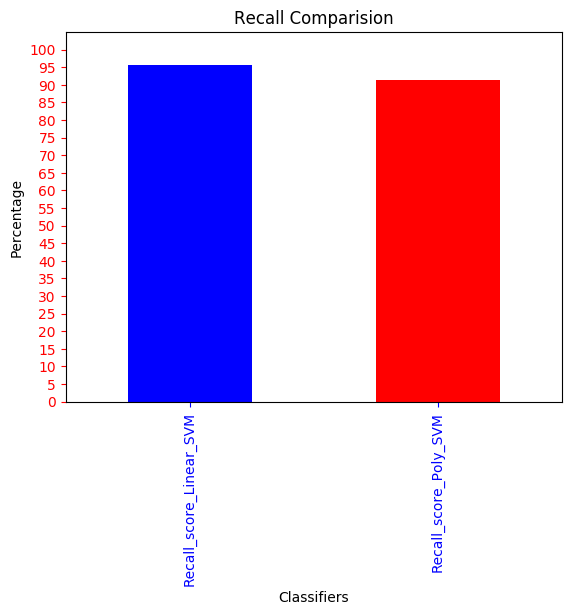

In [320]:
Recall_score_Linear_SVM = (recall_score(y_test, y_pred, average='weighted'))*100
Recall_score_Poly_SVM = (recall_score(y_test, poly_clf_y_pred, average='weighted'))*100

s = pd.Series(
    [Recall_score_Linear_SVM, Recall_score_Poly_SVM],
    index = ["Recall_score_Linear_SVM", "Recall_score_Poly_SVM"]
)

#Set descriptions:
plt.xlabel('Classifiers')
plt.ylabel('Percentage')
plt.title('Recall Comparision')
plt.ylim([0, 105])
plt.yticks(np.arange(0, 105, 5))

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

#Plot the data:
my_colors = ['blue', 'red']  #red, green, blue, black, etc.

s.plot(
    kind='bar', 
    color=my_colors,
)

plt.show()

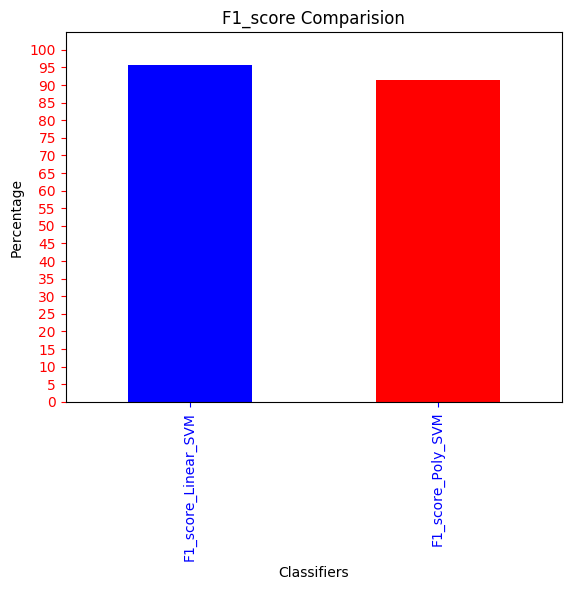

In [321]:
F1_score_Linear_SVM = (f1_score(y_test, y_pred, average='weighted'))*100
F1_score_Poly_SVM = (f1_score(y_test, poly_clf_y_pred, average='weighted'))*100

s = pd.Series(
    [F1_score_Linear_SVM, F1_score_Poly_SVM],
    index = ["F1_score_Linear_SVM", "F1_score_Poly_SVM"]
)

#Set descriptions:
plt.xlabel('Classifiers')
plt.ylabel('Percentage')
plt.title('F1_score Comparision')
plt.ylim([0, 105])
plt.yticks(np.arange(0, 105, 5))


#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

#Plot the data:
my_colors = ['blue', 'red']  #red, green, blue, black, etc.

s.plot(
    kind='bar', 
    color=my_colors,
)

plt.show()